In [1]:
import pandas as pd
import numpy as np

In [8]:
n = pd.read_json("cells.json")
n

,name,id,width,height,terms
0,nand,0,2000,3000,"[{'name': 'a', 'id': 0, 'dir': 0, 'xloc': 666,..."
1,and,1,4000,3500,"[{'name': 'a', 'id': 4, 'dir': 0, 'xloc': 1333..."
2,or,2,3750,3750,"[{'name': 'a', 'id': 7, 'dir': 0, 'xloc': 1250..."
3,xor,3,8000,12000,"[{'name': 'a', 'id': 10, 'dir': 0, 'xloc': 266..."
4,inv,4,2200,3100,"[{'name': 'a', 'id': 13, 'dir': 0, 'xloc': 733..."
5,OUTPUT,5,12000,5000,"[{'name': 'out', 'id': 13, 'dir': 1, 'xloc': 6..."
6,INPUT_a,6,12000,5000,"[{'name': 'a', 'id': 13, 'dir': 0, 'xloc': 400..."
7,INPUT_b,7,12000,5000,"[{'name': 'b', 'id': 13, 'dir': 0, 'xloc': 800..."
8,INPUT_carry,8,12000,5000,"[{'name': 'c', 'id': 13, 'dir': 1, 'xloc': 600..."
9,INPUT,9,1200,800,"[{'name': 'a0', 'id': 14, 'dir': 1, 'xloc': 40..."


In [27]:
n.terms[3]

[{'name': 'a', 'id': 10, 'dir': 0, 'xloc': 2666, 'yloc': 0},
 {'name': 'b', 'id': 11, 'dir': 0, 'xloc': 5333, 'yloc': 0},
 {'name': 'out', 'id': 12, 'dir': 1, 'xloc': 4000, 'yloc': 12000}]

In [24]:
pd.DataFrame{"name": "INPUT_a", "id": 0,"cell": 6, "orient": 3, "id_connected_to":[5,6]})

,name,id,cell,orient,id_connected_to
0,INPUT_a,0,6,3,5
1,INPUT_a,0,6,3,6


In [54]:
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
G_full = nx.Graph()

In [43]:
full_nodes = ['INPUT_a', 'INPUT_b', 'INPUT_c', 'nand', 'nand', 'nand','nand','nand','nand','nand','nand','nand', "OUTPUT", "OUTPUT"]
for i, node in enumerate(full_nodes):
    G_full.add_node(i, type=node)

In [44]:
print(G_full.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [51]:
#full_addr
a = [
[0,0,0,1,1,0,0,0,0,0,0,0,0,0],
[0,0,0,1,0,1,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,0],
[1,1,0,0,1,1,0,0,0,0,1,0,0,0],
[1,0,0,1,0,0,1,0,0,0,0,0,0,0],
[0,1,0,1,0,0,1,0,0,0,0,0,0,0],
[0,0,0,0,1,1,0,1,1,0,0,0,0,0],
[0,0,1,0,0,0,1,0,1,1,1,0,0,0],
[0,0,0,0,0,0,1,1,0,0,0,1,0,0],
[0,0,1,0,0,0,0,1,0,0,0,1,0,0],
[0,0,0,1,0,0,0,1,0,0,0,0,1,0],
[0,0,0,0,0,0,0,0,1,1,0,0,0,1],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,1,0,0]]

In [52]:
for i in range(len(a)):
    for j in range(len(a)):
        if a[i][j] == 1:
            G_full.add_edge(i,j)

In [53]:
print(G_full.edges)

[(0, 3), (0, 4), (1, 3), (1, 5), (2, 7), (2, 9), (3, 4), (3, 5), (3, 10), (4, 6), (5, 6), (6, 7), (6, 8), (7, 8), (7, 9), (7, 10), (8, 11), (9, 11), (10, 12), (10, 13), (11, 13)]


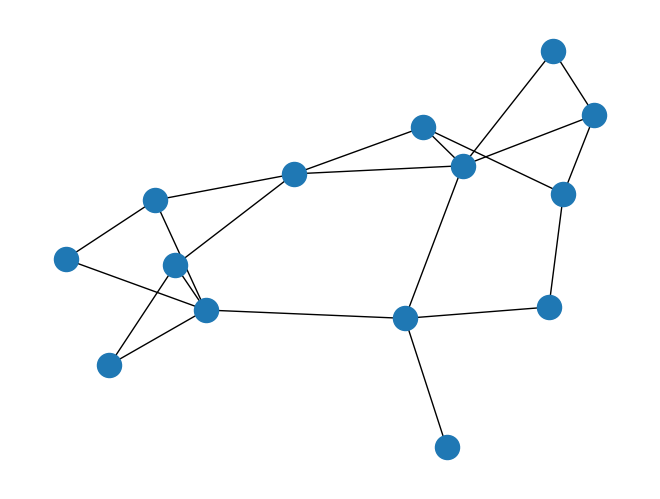

In [56]:
nx.draw(G_full)

In [58]:
layout = nx.spring_layout(G_full)
labels = {idx: type for idx, type in enumerate(full_nodes)}


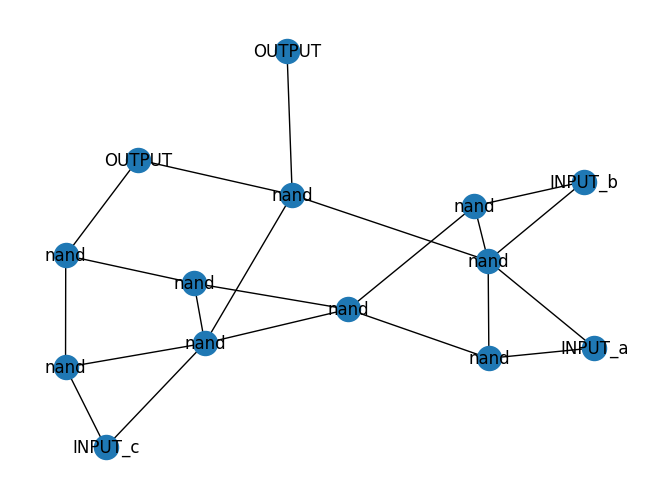

In [59]:
#full_addr
nx.draw(G_full, layout, with_labels=True, labels=labels)

In [60]:
#multi_bit
b = matrix = [
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
]

In [62]:
G_multi = nx.Graph()
multi_nodes = ['INPUT_a', 'INPUT_b', 'INPUT_c', 'xor', 'nand', 'nand','nand','xor','nand','xor','nand','xor', 'nand', "OUTPUT", "OUTPUT", 'OUTPUT']
for i, node in enumerate(multi_nodes):
    G_multi.add_node(i, type=node)

In [63]:
for i in range(len(b)):
    for j in range(len(b)):
        if b[i][j] == 1:
            G_multi.add_edge(i,j)

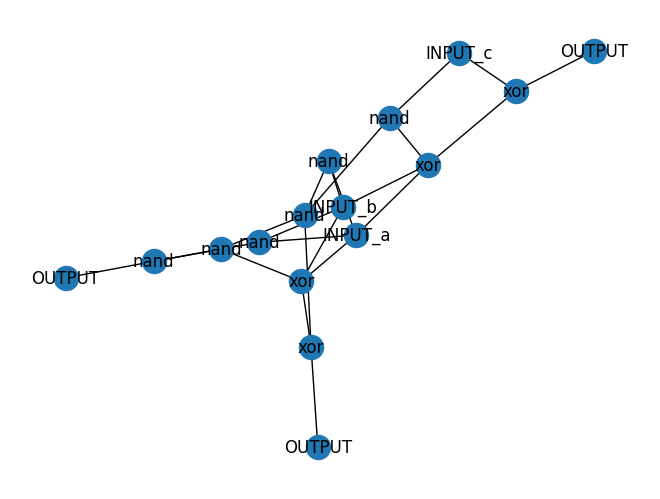

In [65]:
#multi_bit
layout_multi = nx.spring_layout(G_multi)
labels_multi= {idx: type for idx, type in enumerate(multi_nodes)}
nx.draw(G_multi, layout_multi, with_labels=True, labels=labels_multi)

In [70]:
import torch
from torch_geometric.utils.convert import from_networkx

In [73]:
from_networkx(G_full)

Data(edge_index=[2, 42], type=[14], num_nodes=14)

In [74]:
from_networkx(G_multi)

Data(edge_index=[2, 46], type=[16], num_nodes=16)